In [1]:
import tensorflow as tf
import pandas as pd
import os
import numpy as np
import pickle
import math
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
model = tf.keras.models.load_model('trained_models/Extrap_RNN_ACTS_barrel', compile=False)

2022-05-13 17:20:02.667296: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-13 17:20:02.732244: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-13 17:20:02.732502: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-13 17:20:02.733442: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [3]:
from sklearn.utils import shuffle
filepath = 'local_data/formatted/ACTSDataWithLayerInfo_Barrel_SingleHitPerLayer'
with open(filepath, 'rb') as pFile:
    x = pickle.load(pFile)
    y = pickle.load(pFile)

x,y = shuffle(x,y)

#Try selecting a fraction of the tracks
x = x[0:int(len(x)/10)]
y = y[0:int(len(y)/10)]

xNorm = 1068
yNorm = 1068
zNorm = 3025.5

xScaled=deepcopy(x)
xScaled = xScaled[:,:,0:3]
xScaled[:,:,0] = xScaled[:,:,0]/xNorm
xScaled[:,:,1] = xScaled[:,:,1]/yNorm
xScaled[:,:,2] = xScaled[:,:,2]/zNorm

yScaled=deepcopy(y)
yScaled = yScaled[:,:,0:3]
yScaled[:,:,0] = yScaled[:,:,0]/xNorm
yScaled[:,:,1] = yScaled[:,:,1]/yNorm
yScaled[:,:,2] = yScaled[:,:,2]/zNorm

predictions = model.predict(xScaled)

predictions[:,:,0] = predictions[:,:,0]*xNorm
predictions[:,:,1] = predictions[:,:,1]*yNorm
predictions[:,:,2] = predictions[:,:,2]*zNorm

2022-05-13 17:20:09.825669: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8302
2022-05-13 17:20:10.034506: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


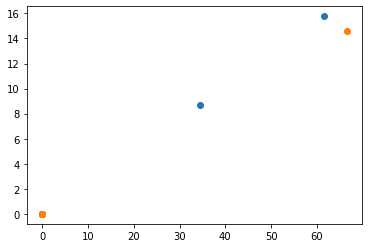

In [4]:
plt.scatter(predictions[1,:,0], predictions[1,:,1])
plt.scatter(y[1,:,0], y[1,:,1])

In [18]:
model.compile(loss='mse')

In [20]:
model.evaluate(xScaled, yScaled[:,:,0:3])

1437/4536 [========>.....................] - ETA: 12s - loss: 0.0014

KeyboardInterrupt: 

In [5]:

filepath = 'local_data/extrapData/ACTS_ttbarWithOverlay_mu200_0.pkl'
with open(filepath, 'rb') as pFile:
    _ = pickle.load(pFile, encoding='latin1')
    _ = pickle.load(pFile, encoding='latin1')

    x_train = pickle.load(pFile, encoding='latin1')
    x_test = pickle.load(pFile,  encoding='latin1')
    x_train_flat = pickle.load(pFile,  encoding='latin1')
    x_test_flat = pickle.load(pFile,  encoding='latin1')
    x_train_layer = pickle.load(pFile,  encoding='latin1')
    x_test_layer = pickle.load(pFile,  encoding='latin1')

    _ = pickle.load(pFile,  encoding='latin1')
    _ =  pickle.load(pFile,  encoding='latin1')
    _ = pickle.load(pFile,  encoding='latin1')
    _ = pickle.load(pFile,  encoding='latin1')

    y_train = pickle.load(pFile,  encoding='latin1')
    y_test = pickle.load(pFile,  encoding='latin1')

    _ = pickle.load(pFile,  encoding='latin1')
    _ = pickle.load(pFile,  encoding='latin1')

    pt_train = pickle.load(pFile,  encoding='latin1')
    pt_test = pickle.load(pFile,  encoding='latin1')
            
#     x_data, y_data, pt_data = dataWindow(3, x_train_flat, x_train_layer, pt_train)
#     x_data_test, y_data_test, pt_data_test = dataWindow(3, x_test_flat, x_test_layer, pt_test)

#     if x is None:
#         x = x_data
#         y = y_data
#         pt = pt_data
#         x = np.append(x, x_data_test, axis=0)
#         y = np.append(y, y_data_test, axis=0)
#         pt = np.append(pt, pt_data_test, axis=0)
#     else:
#         x = np.append(x, x_data, axis=0)
#         y = np.append(y, y_data, axis=0)
#         pt = np.append(pt, pt_data, axis=0)
#         x = np.append(x, x_data_test, axis=0)
#         y = np.append(y, y_data_test, axis=0)
#         pt = np.append(pt, pt_data_test, axis=0)

In [30]:
def remove_padding(tracks):
    x = tracks[:,:,0].reshape(-1)
    x = x[np.where(x!=0)[0]]
    
    y = tracks[:,:,1].reshape(-1)
    y = y[np.where(y!=0)[0]]
    
    z = tracks[:,:,2].reshape(-1)
    z = z[np.where(z!=0)[0]]
    
    return x,y,z

def remove_predictions_padding(predictions, tracks):
    t = tracks[:,:,0].reshape(-1)
    idx = np.where(t!=0)[0]
    x = predictions[:,:,0].reshape(-1)
    x = x[idx]
    
    y = predictions[:,:,1].reshape(-1)
    y = y[idx]
    
    z = predictions[:,:,2].reshape(-1)
    z = z[idx]
    
    return x,y,z

In [31]:
X_inp,Y_inp,Z_inp = remove_padding(x)
X_tar,Y_tar,Z_tar = remove_padding(y)
X_pred,Y_pred,Z_pred = remove_predictions_padding(predictions,y)

Text(0, 0.5, '$\\rho$ (mm)')

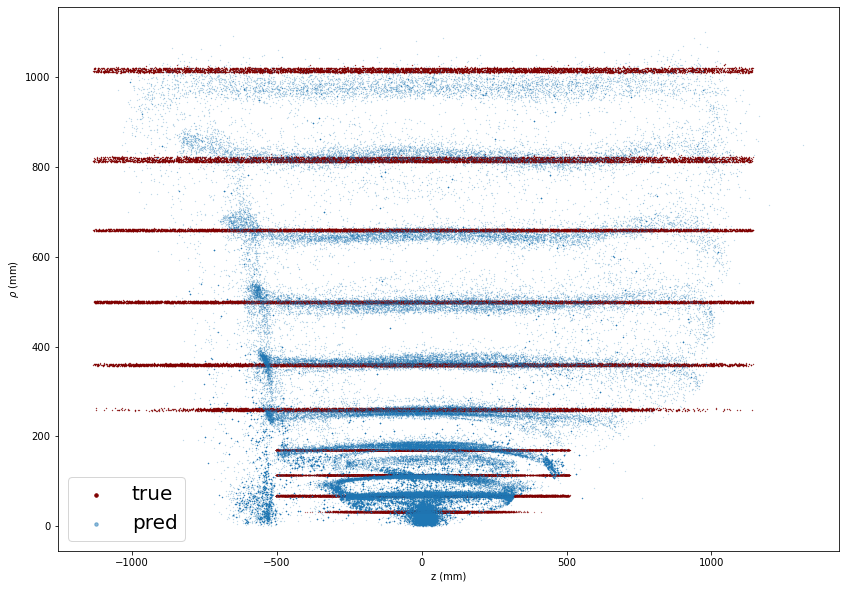

In [24]:
fig = plt.figure(figsize=(14,10))
plt.scatter(Z_inp, np.sqrt(X_inp**2+Y_inp**2), s=.05, label='true', color='maroon')
plt.scatter(Z_tar, np.sqrt(X_tar**2+Y_tar**2), s=.05, color='maroon')
plt.scatter(Z_pred, np.sqrt(X_pred**2+Y_pred**2), s=.05,alpha=0.5, label='pred')


lgnd = plt.legend(prop={'size': 20})
for handle in lgnd.legendHandles:
    handle.set_sizes([12.0])
plt.xlabel('z (mm)')
plt.ylabel(r'$\rho$ (mm)')
#plt.savefig('fig.png')

Text(0, 0.5, 'y (mm)')

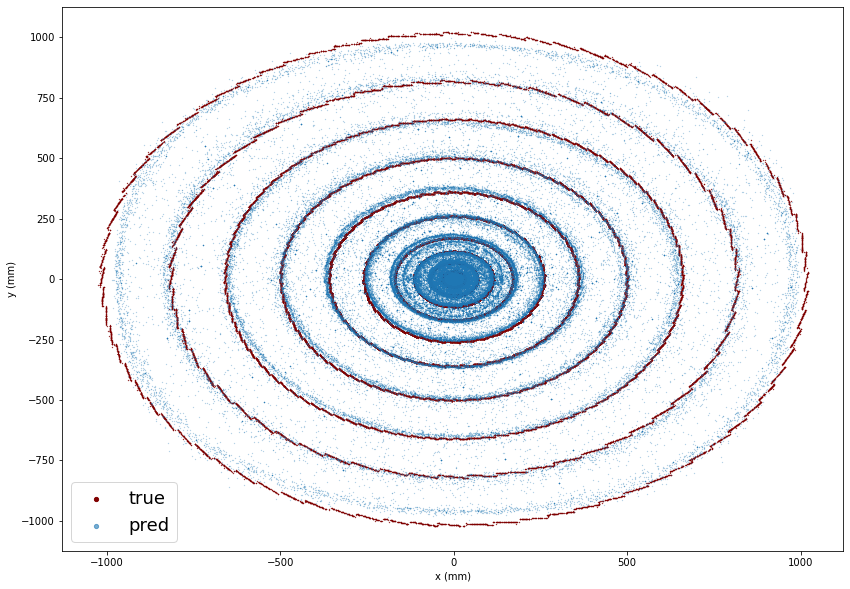

In [25]:
fig = plt.figure(figsize=(14,10))
plt.scatter(X_inp, Y_inp, s=.05, label='true', color='maroon')
plt.scatter(X_tar, Y_tar, s=.05, color='maroon')
plt.scatter(X_pred, Y_pred, s=.05,alpha=0.6, label='pred')
lgnd = plt.legend(loc='lower left',prop={'size': 18})
for handle in lgnd.legendHandles:
    handle.set_sizes([18.0])
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
#plt.savefig('fig.png')

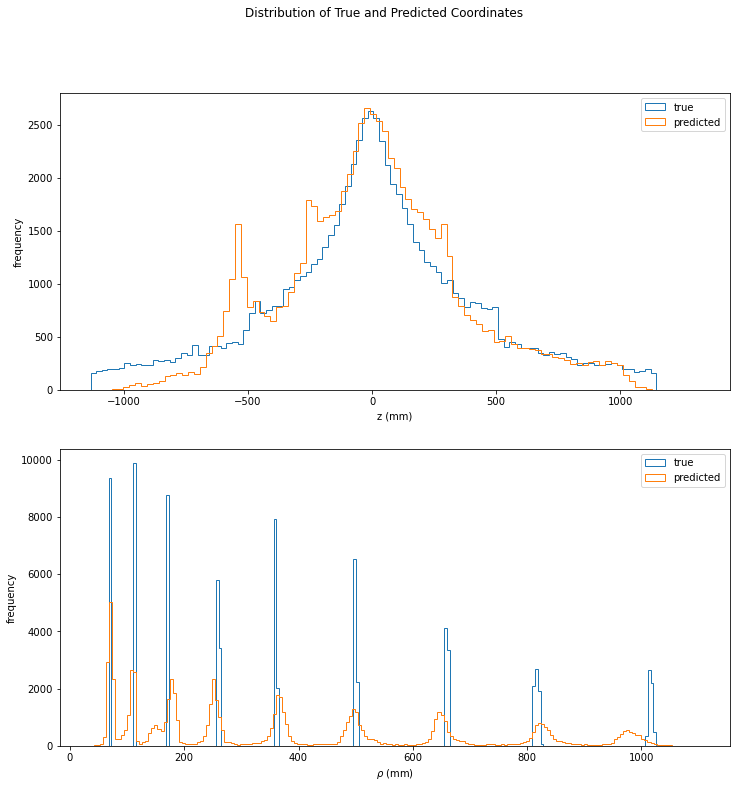

In [34]:
# plot distributions of predicted rho and z
fig, axs = plt.subplots(2, figsize=(12,12))
fig.suptitle('Distribution of True and Predicted Coordinates')

axs[0].hist(Z_tar.reshape(-1), histtype='step', bins=100, label='true')
axs[0].hist(Z_pred.reshape(-1), histtype='step', bins=100, label='predicted')
axs[0].set_xlabel('z (mm)')
axs[0].set_ylabel('frequency')
axs[0].legend();
#axs[0].set_yscale('log')


axs[1].hist(np.sqrt(Y_tar**2+X_tar**2).reshape(-1), histtype='step', bins=200, label='true')
axs[1].hist(np.sqrt(Y_pred**2+X_pred**2).reshape(-1), histtype='step', bins=200, label='predicted')
axs[1].set_xlabel(r'$\rho$ (mm)')
axs[1].set_ylabel('frequency')
axs[1].legend();
#axs[1].set_yscale('log')

/tmp/ipykernel_4799/1693697876.py:1: RuntimeWarning: invalid value encountered in arcsin
  plt.hist(np.arcsin(Y_tar/X_tar), histtype='step', bins=100, label='true')
/tmp/ipykernel_4799/1693697876.py:2: RuntimeWarning: invalid value encountered in arcsin
  plt.hist(np.arcsin(Y_pred/X_pred), histtype='step', bins=100, label='predicted')


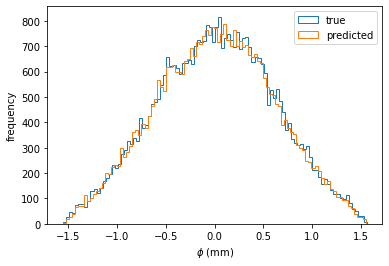

In [35]:
plt.hist(np.arcsin(Y_tar/X_tar), histtype='step', bins=100, label='true')
plt.hist(np.arcsin(Y_pred/X_pred), histtype='step', bins=100, label='predicted')
plt.xlabel(r'$\phi$ (mm)')
plt.ylabel('frequency')
plt.legend();
#axs[1].set_yscale('log')

In [12]:
import math

In [37]:
np.where(y[:,:,3]==0)

(array([    0,     0,     0, ..., 14513, 14513, 14513]),
 array([ 0,  1,  2, ..., 11, 12, 13]))

In [39]:
y[0,:,3]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [46]:
def residuals():
#     if volume=='barrel': vol = 0
#     elif volume='ec': vol = 1
    
    rho = np.sqrt(X_tar**2+Y_tar**2)
    dPhi = np.arcsin(Y_tar/X_tar)-np.arcsin(Y_pred/X_pred)
    dZ = Z_tar-Z_pred
    dRho = np.sqrt(X_tar**2+Y_tar**2) - np.sqrt(X_pred**2+Y_pred**2)
    
    res=[]
    for i in dPhi:
        if math.isnan(i): continue
        res.append(i)
        
    stdPhi = np.std(res)
    stdZ = np.std(dZ)
    stdRho = np.std(dRho)
    
    return dPhi, dZ, dRho, stdPhi, stdZ, stdRho

In [49]:
def plotUncertainty():
    

    dPhi, dZ, dRho, stdPhi, stdZ, stdRho = residuals()
    
    fig,axs=plt.subplots(1,3, figsize=(12,6))
    axs[0].hist(dPhi, bins=100)
    axs[0].set_xlabel(r'$\Delta \phi$ (rad)')
    #axs[0].set_xlim([-.1,.1])
    axs[0].text(.65, .9, r"$\sigma=$" + "{:.4f}".format(stdPhi),
        color="black", fontsize=12, bbox=dict(boxstyle="round", fc="white", ec="black", pad=0.2),
                transform=axs[0].transAxes)
    axs[0].set_yscale('log')


    axs[1].hist(dZ, bins=100)
    axs[1].set_xlabel(r'$\Delta Z$ (mm)')
    #axs[1].set_xlim([-50,50])
    axs[1].text(.65, .9, r"$\sigma=$" + "{:.4f}".format(stdZ),
        color="black", fontsize=12,  bbox=dict(boxstyle="round", fc="white", ec="black", pad=0.2),
                transform=axs[1].transAxes)
    axs[1].set_yscale('log')
    
    axs[2].hist(dRho, bins=100)
    #axs[2].set_xlim([-100,100])
    axs[2].set_xlabel(r'$\Delta \rho (mm)$')
    axs[2].text(.65, .9, r"$\sigma=$" + "{:.4f}".format(stdRho),
        color="black", fontsize=12,  bbox=dict(boxstyle="round", fc="white", ec="black", pad=0.2),
                transform=axs[2].transAxes)
    axs[2].set_yscale('log')
    
    fig.tight_layout()

    
    
    return dPhi, dZ, dRho

/tmp/ipykernel_4799/265668857.py:6: RuntimeWarning: invalid value encountered in arcsin
  dPhi = np.arcsin(Y_tar/X_tar)-np.arcsin(Y_pred/X_pred)


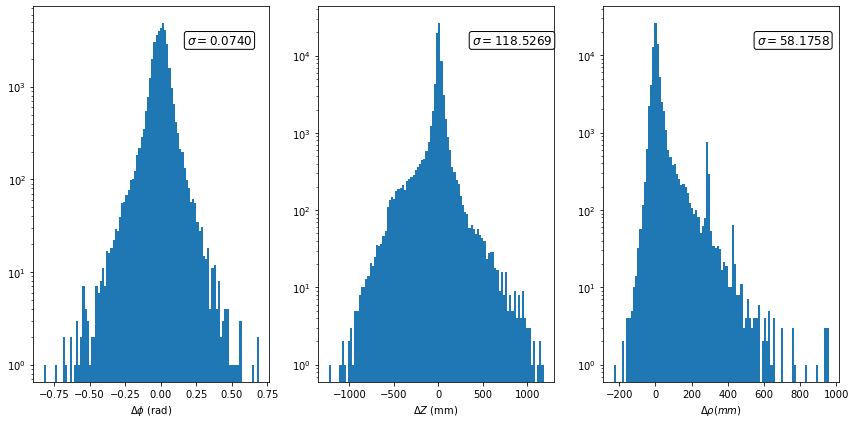

In [50]:
plotUncertainty();

In [18]:
idx, dPhi, dZ, dRho, stdPhi, stdZ, stdRho = residuals(3)

TypeError: residuals() missing 1 required positional argument: 'layer'

In [17]:
plt.scatter(x[idx[0]][:,0],x[idx[0]][:,1])
plt.scatter(y[idx[0]][0],y[idx[0]][1])
plt.scatter(predictions[idx[0]][0],predictions[idx[0]][1])

NameError: name 'idx' is not defined

Text(0, 0.5, 'Y')

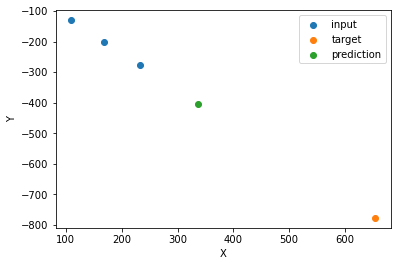

In [212]:
plt.scatter(x[idx[411]][:,0],x[idx[411]][:,1], label='input')
plt.scatter(y[idx[411]][0],y[idx[411]][1], label='target')
plt.scatter(predictions[idx[411]][0],predictions[idx[411]][1], label='prediction')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')

Text(0, 0.5, '$\\rho$')

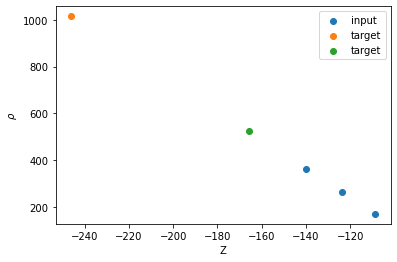

In [213]:
plt.scatter(x[idx[411]][:,2], np.sqrt(x[idx[411]][:,0]**2 + x[idx[411]][:,1]**2), label='input')
plt.scatter(y[idx[411]][2], np.sqrt(y[idx[411]][0]**2 + y[idx[411]][1]**2), label='target')
plt.scatter(predictions[idx[411]][2], np.sqrt(predictions[idx[411]][0]**2 + predictions[idx[411]][1]**2), label='target')
plt.legend()
plt.xlabel('Z')
plt.ylabel(r'$\rho$')

In [14]:
np.std(y[:,2]-predictions[:,2])

13.045719

In [11]:
res = []
for i in range(len(y)):
    deltaZ = y[:,2]-predictions[:,2]
    if math.isnan(deltaZ): continue
    res.append(deltaZ)
np.std(res)

TypeError: only size-1 arrays can be converted to Python scalars

In [19]:
#Plot the distribution of angles between predictions and truth
angles = []
for p in range(len(y)):
    norm_a = np.linalg.norm(y[p])
    norm_b = np.linalg.norm(predictions[p])
    angle = np.dot(y[p], predictions[p]) / (norm_a * norm_b)
    angle = np.arccos(angle)
    angles.append(angle)
angles = np.array(angles)

ValueError: shapes (20,) and (3,) not aligned: 20 (dim 0) != 3 (dim 0)

Text(0.5, 0, 'angle between predicted and true hits (rads)')

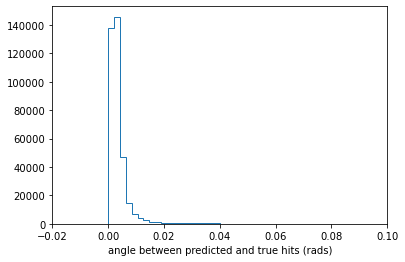

In [17]:
plt.hist(angles, bins=100, histtype='step');
plt.xlim([-.02,.1])
plt.xlabel('angle between predicted and true hits (rads)')

In [23]:
angles

array([0.00799353, 0.00210018, 0.00133721, ..., 0.00129187, 0.00336525,
       0.00529285], dtype=float32)

In [109]:
# Plot the number of hits in an event closer than the predicted one
n_neighbors = []
for i in range(len(newdf) - 3):
    window = newdf.iloc[[i, i+1, i+2]][['x','y','z']].values
    pred = model.predict(window[np.newaxis, :])[0]
    err = displacement(newdf.iloc[i+3][['x','y','z']].values, pred)
    count = 0
    # rather than compare this to every hit, just compare to nearby ones
    xCut = .1
    yCut = .1
    zCut = .1

    nearbyHits = newdf.loc[(newdf.x >= newdf.x-xCut) & (newdf.x <= newdf.x+xCut)]
    nearbyHits = nearbyHits.loc[(nearbyHits.y >= nearbyHits.y-yCut) & (nearbyHits.y <= nearbyHits.y+yCut)]
    nearbyHits = nearbyHits.loc[(nearbyHits.z >= nearbyHits.z-zCut) & (nearbyHits.z <= nearbyHits.z+zCut)]
    for j in range(len(nearbyHits)):
        dist = displacement(nearbyHits.iloc[j][['x','y','z']].values, pred)
        if dist < err:
            count += 1
        n_neighbors.append(count)


KeyboardInterrupt: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


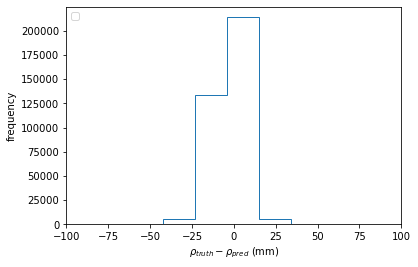

In [10]:
plt.hist(np.sqrt(y[:,0]**2+y[:,1]**2) - np.sqrt(predictions[:,0]**2+predictions[:,1]**2), histtype='step', bins=30)
plt.xlabel(r'$\rho_{truth} - \rho_{pred}$ (mm)')
plt.ylabel('frequency')
plt.xlim([-100,100])
plt.legend();
#axs[1].set_yscale('log')

In [62]:
# Plot errors as a function of pT

In [63]:
from scipy.stats import binned_statistic


mean_stat = binned_statistic(pt, err, 
                             statistic='mean', 
                             bins=20, 
                             range=(min(pt), 200))

std_stat = binned_statistic(pt, err, 
                             statistic='std', 
                             bins=20, 
                             range=(min(pt), 200))

(-10.0, 200.0)

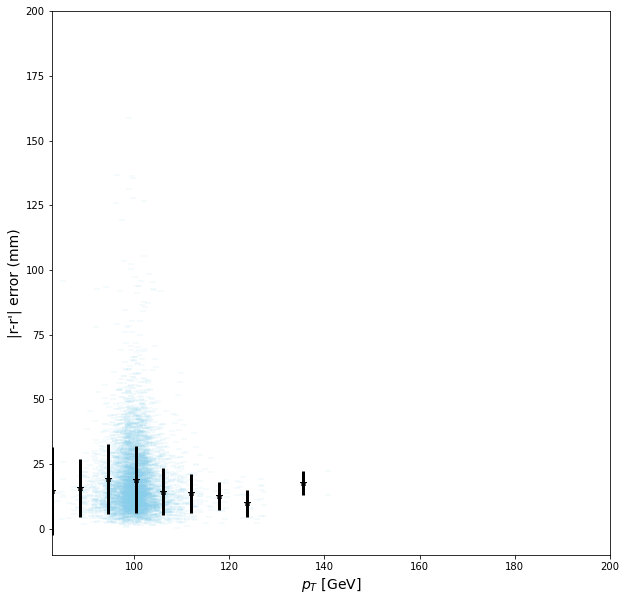

In [64]:
fig = plt.figure(figsize=(10,10))
plt.scatter(pt, err,marker='_', alpha=.1, color='skyblue')
plt.errorbar(mean_stat.bin_edges[:-1], mean_stat.statistic, yerr=std_stat.statistic, 
             fmt='*',
             color='black',
             lw=10,
            ecolor='black',
            elinewidth=3)
#plt.xscale('log')
plt.xlabel('$p_{T}$ [GeV]', fontsize=14);
plt.ylabel("|r-r'| error (mm)", fontsize=14);
plt.xlim([min(pt),200])
plt.ylim([-10, 200])
#plt.xscale('log')
#plt.title('Sum of Distance Between Predicted and True Hits per Track')
#plt.savefig('Etaefficiency.pdf')

In [124]:
def get_eta(r, z):
    # eta = -ln(tan(theta/2))
    if z == 0:
        return 0

    sign = 1
    if z < 0:
        sign = -1
        z = abs(z)
    theta = math.atan(r/float(z))
    tan_theta_over_two = math.tan(theta/2.)
    try:
        eta = -math.log( tan_theta_over_two )
    except ValueError:
        print ("can't take log of", tan_theta_over_two, 'from theta =', theta)
        sys.exit()
    return eta * sign

#find eta of the first hit in every track
eta=[]
for ii in range(len(x)):
    hitx = x[ii,0,0]*1015
    hity = x[ii,0,1]*1015
    hitz = x[ii,0,2]*3000
    hitr = np.sqrt((hitx)**2 + (hity)**2 + (hitz)**2)
    eta.append(get_eta(hitr,hitz))
    
from scipy.stats import binned_statistic

mean_stat = binned_statistic(eta, err, 
                             statistic='mean', 
                             bins=20, 
                             range=(min(eta), max(eta)))

std_stat = binned_statistic(eta, err, 
                             statistic='std', 
                             bins=20, 
                             range=(min(eta), max(eta)))

(0.0, 100.0)

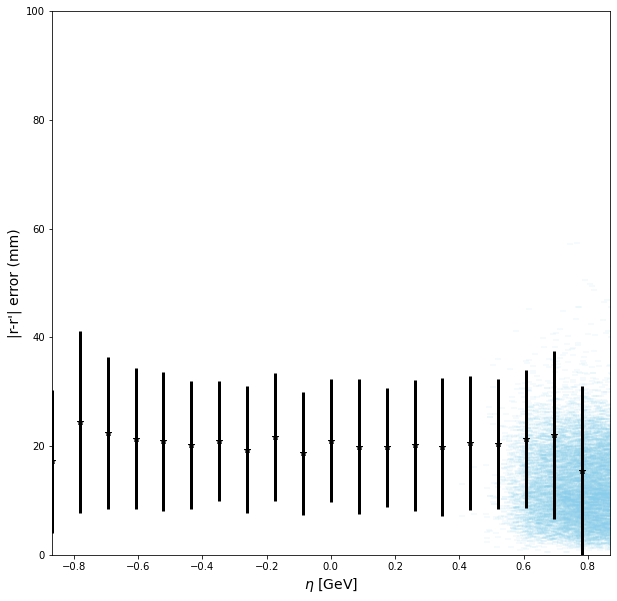

In [125]:
fig = plt.figure(figsize=(10,10))
plt.scatter(pt, err,marker='_', alpha=.1, color='skyblue')
plt.errorbar(mean_stat.bin_edges[:-1], mean_stat.statistic, yerr=std_stat.statistic, 
             fmt='*',
             color='black',
             lw=10,
            ecolor='black',
            elinewidth=3)
#plt.xscale('log')
plt.xlabel('$\eta$ [GeV]', fontsize=14);
plt.ylabel("|r-r'| error (mm)", fontsize=14);
plt.xlim([min(eta),max(eta)])
plt.ylim([-0, 100])
#plt.xscale('log')
#plt.title('Sum of Distance Between Predicted and True Hits per Track')
#plt.savefig('Etaefficiency.pdf')